In [43]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("time.csv",
                names=['id','date','time','consumption'],
                parse_dates= {'datetime':['date','time']},
                index_col='id',
                header=0,
                date_parser=lambda x,y: pd.to_datetime(x+' '+y,format='%d %b %Y %H:%M:%S'))

In [45]:
df=df.sort_values("datetime")

In [46]:
df.head()

,datetime,consumption
id,,
77476,2022-01-01 00:22:28,1.030
76780,2022-01-01 00:42:33,0.904
76954,2022-01-01 01:01:51,0.904
76548,2022-01-01 01:41:48,1.850
77070,2022-01-01 02:22:52,1.878


In [47]:
print(f"min date: {df['datetime'].min()}, max date: {df['datetime'].max()}")
print(f"range: {df['datetime'].max()-df['datetime'].min()}")

min date: 2022-01-01 00:22:28, max date: 2022-01-20 23:47:55
range: 19 days 23:25:27


<AxesSubplot:xlabel='datetime'>

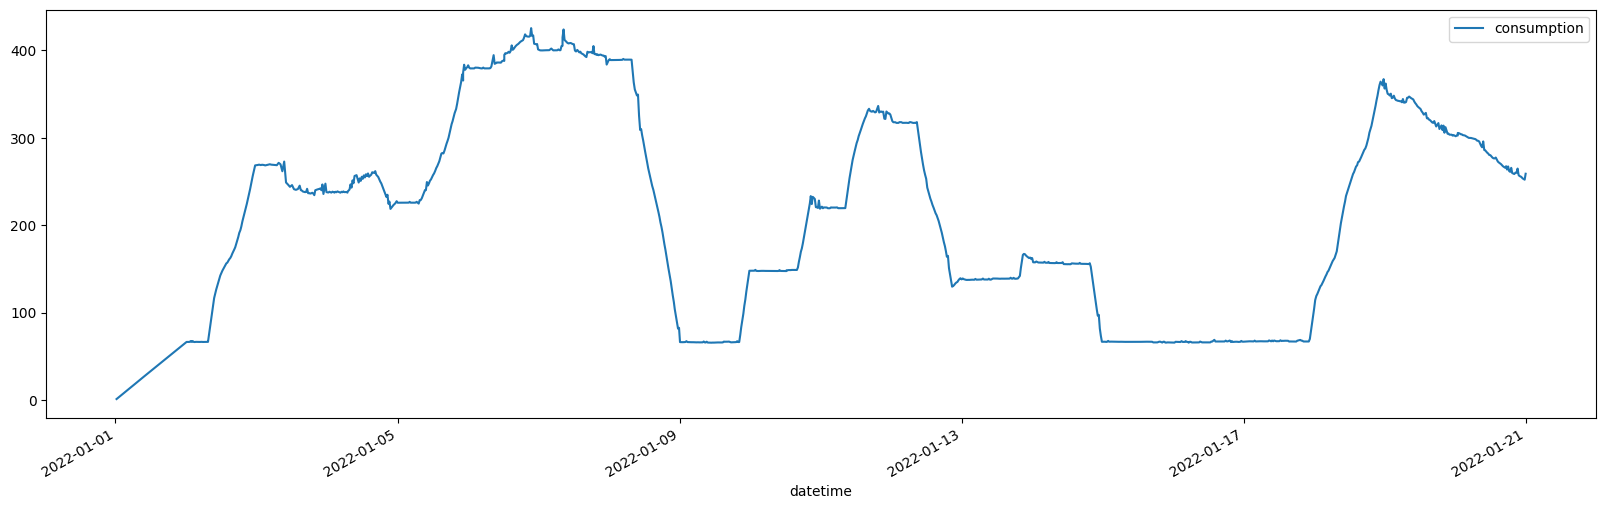

In [48]:
df.rolling('1D',on='datetime').sum().loc[df['consumption']>0.5].plot(x='datetime',y='consumption',figsize=(20,6))

In [49]:
#Aggregating to day 

df_copy = df.set_index('datetime').sort_index()
df_copy = df_copy.resample('1D').sum()

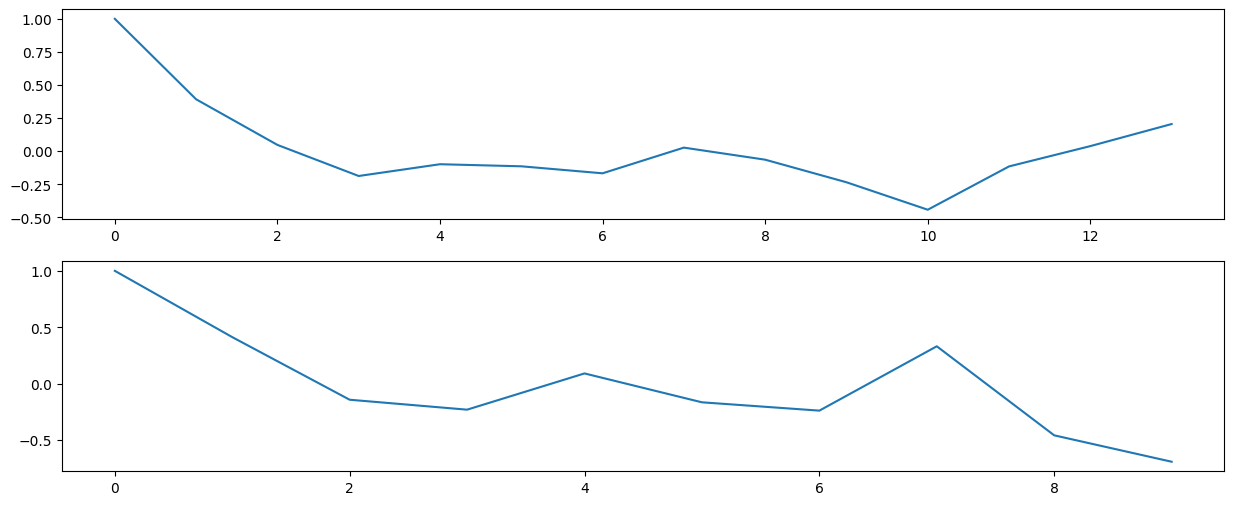

In [50]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(df_copy)
pacf_plot = pacf(df_copy)

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

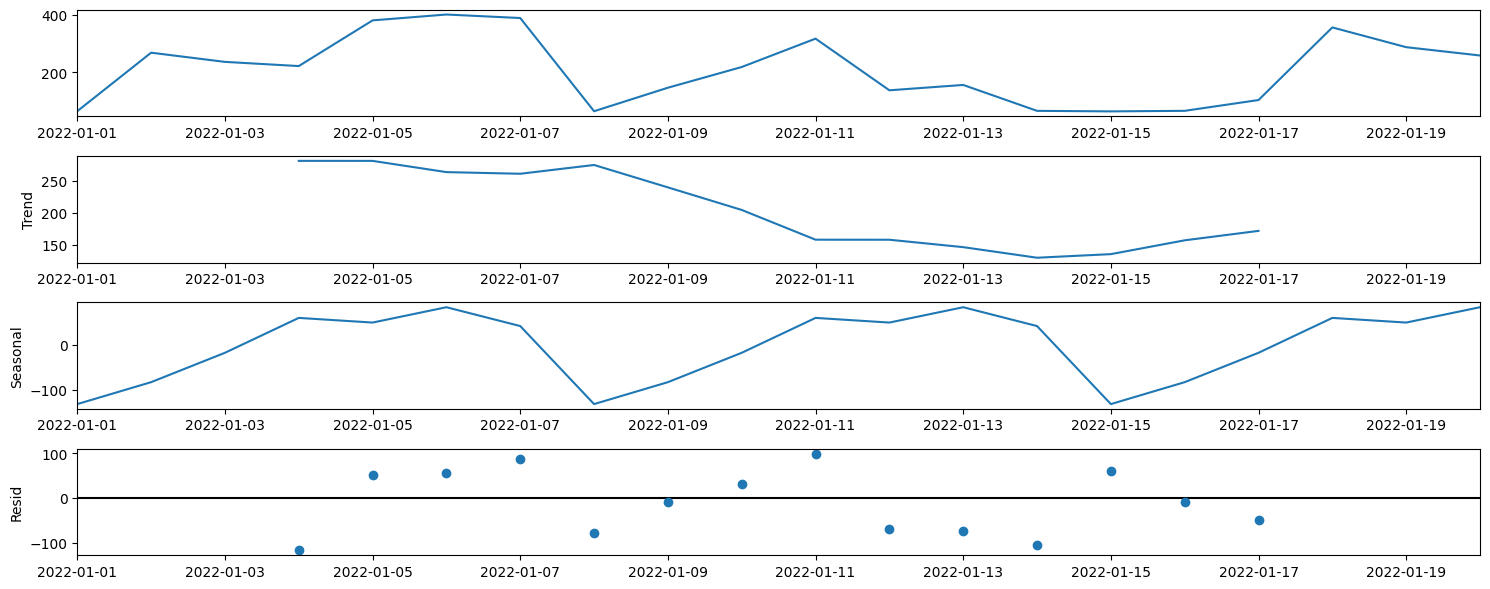

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy)
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

In [52]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_copy,order=(10,1,1))
model_fit = model.fit()

next_one_m = model_fit.predict('2022-01-20','2022-03-01')

C:\Users\monik\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\monik\Downloads\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


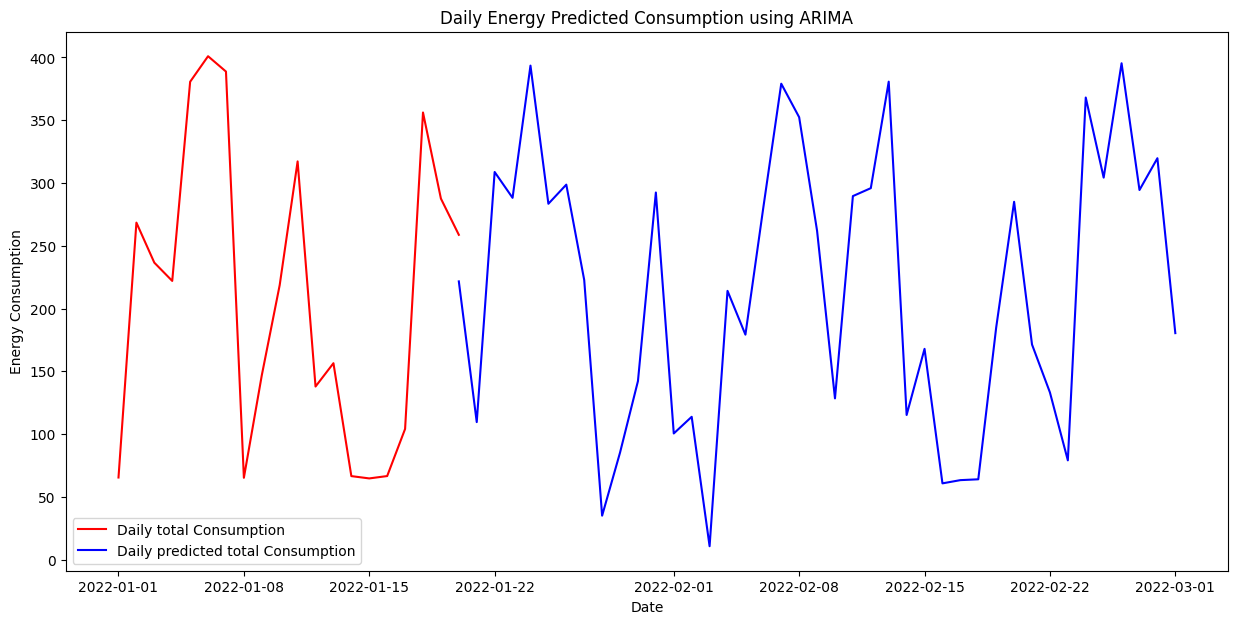

In [53]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],c="red",label='Daily total Consumption')
ax.plot(next_one_m,c="blue",label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()